In [9]:
#this cell define dataset ,model, train, test plot functions
import torch
import Trainer
from network import NFM
import torch.utils.data as Data
from Utils.criteo_loader import getTestData, getTrainData

nfm_config = \
{
    'n_class':9,
    'linear_hidden1':2000,
    #'linear_hidden':100,#线性模型输出层（隐层个数）
    #'embed_input_dim':1001,#embed输入维度
    #'embed_dim': 100, # 用于控制稀疏特征经过Embedding层后的稠密特征大小，embed输出维度
    #'dnn_hidden_units': [100,11],#MLP隐层和输出层
    
    'dnn_hidden_units':[100,9],#MLP隐层
    'num_sparse_features_cols':10477,#the number of the gene columns
    'num_dense_features': 0,#dense features number
    'bi_dropout': 0.5,#Bi-Interaction 的dropout
    'num_epoch': 500,#训练epoch次数
    'batch_size': 16,#batch_size
    'lr': 1e-3,
    'l2_regularization': 1e-4,
    'device_id': 0,
    'use_cuda': False,
    'epoch':1000,
    
    #'train_file': '../Data/criteo/processed_data/train_set.csv',
    #'fea_file': '../Data/criteo/processed_data/fea_col.npy',
    #'validate_file': '../Data/criteo/processed_data/val_set.csv',
    #'test_file': '../Data/criteo/processed_data/test_set.csv',
    #'model_name': '../TrainedModels/NFM.model'
    #'train_file':'data/xiaoqiu_gene_5000/train/final_5000_encode_100x.csv',
    #'train_data':'dataset/qiuguan/encode/encode_1000/train/train_encode_data_1000_new.csv',
    #'train_label':'dataset/qiuguan/non_code/train/train_label.csv',
    #'guan_test_data':'dataset/qiuguan/non_code/guan_test/guan_test_data.csv',
    #'guan_test_label':'dataset/qiuguan/non_code/guan_test/guan_test_label.csv',
    #'test_data':'dataset/qiuguan/encode/encode_1000/test/test_encode_data_1000_new.csv',
    #'test_label':'dataset/qiuguan/non_code/test/test_labels.csv',
    #'title':'dataset/xiaoguan/RF/RF_for_train/train_class_9/test/test_data.csv',
    
    #'all':''
    #'title':'data/xiaoqiu_gene_5000/train/gene_5000_gene_name.csv',
    #'all':'data/xiaoqiu_gene_5000/train/gene_5000_label_name.csv'
}

#model definition
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(3300)
        self.fc1 = nn.Linear(3300, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model = MLP().cuda()
print(model)

class MLP1(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(242)
        self.fc1 = nn.Linear(242, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model1 = MLP1().cuda()
print(model1)
class MLP2(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(127)
        self.fc1 = nn.Linear(127, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model2 = MLP2().cuda()
print(model2)


class MLP3(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(171)
        self.fc1 = nn.Linear(171, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model3 = MLP3().cuda()
print(model3)
import os
import time
import argparse
import numpy as np
import pandas as pd 

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import torch.nn.functional as F  # 激励函数的库
#import network
import config
import evaluate
import data_utils
#import Trainer



def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    #n = len(labels)
    n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output

def one_hot(labels, classes):
    n = len(labels)
    #eoff = label_smoothing / classes
    output = np.zeros((n, classes), dtype=np.float32)
    for row, label in enumerate(labels):
        output[row, label] = 1
        #print("row:",row,"label:",label)
    return output


def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    #n = len(labels)
    n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output

def one_hot(labels, classes):
    n = len(labels)
    #eoff = label_smoothing / classes
    output = np.zeros((n, classes), dtype=np.float32)
    for row, label in enumerate(labels):
        output[row, label] = 1
        #print("row:",row,"label:",label)
    return output



class KZDatasetPredict(data.Dataset):
    """ Construct the FM pytorch dataset. """
    #def __init__(self, file,label_file, feature_map,n_class=16):
    def __init__(self, df_list):
    
       
        self.data_info = self.get_data_info(df_list)
        
        
            
        
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data,label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data,label

    def __len__(self):
        return len(self.data_info)
   
    
    
    def get_data_info(self,df_list):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        print('data_info:',df_list[-1])
        #df=pd.read_csv(csv_path,sep=',')
        #df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        label=int(df_list[-1])
        labels.append(label)
        print('labels:',labels)
        data=df_list[:-1]
        #df_np=np.array(df_list)
        #print(rows,cols)
        
        #print('labels:',labels)
        labels=np.array(labels)
        print('labels.shape:',labels.shape)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        
           
        
        data=np.array(data)#
            
            
            
            
            
            
            
            
        data=torch.from_numpy(data)#
            
        labels=torch.from_numpy(labels)#
        #bi_data=embding_process(nfm_config,data)
        #print("bi_data.shape:",bi_data.shape)
            
            
        data_info.append((data,label))
        return data_info
class KZDatasetTest(data.Dataset):
    """ Construct the FM pytorch dataset. """
    #def __init__(self, file,label_file, feature_map,n_class=16):
    def __init__(self, csv_path):
    
       
        self.data_info = self.get_data_info(csv_path)
        
        
            
        
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data, label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data, label

    def __len__(self):
        return len(self.data_info)
   
    
    
    def get_data_info(self,csv_path):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        df=pd.read_csv(csv_path,sep=',')
        df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        rows,cols=df.shape
        print(rows,cols)
        for i in df.iloc[:,-1]:
            #print(i)
            labels.append(int(i))
        #print('labels:',labels)
        labels=np.array(labels)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        for i in range(rows):
            data=df.iloc[i,:-1]
            data=data.astype(float)#
            data=np.array(data)#
            
            label=labels[i]
            #print(data.shape)
            #print(label.shape)
            #label=label.tolist()
            data=torch.from_numpy(data)#
            label=torch.from_numpy(label)#
            
            
            data_info.append((data,label))
        return data_info
import torch
import torch.nn as nn
from torch.utils.data.dataset import *
from PIL import Image
from torch.nn import functional as F
import random
from sklearn.model_selection import train_test_split
import ast
import torchvision


        

class KZDataset(Dataset):
    def __init__(self, csv_path, K,n_class,ki=0, typ='train', transform=None, rand=False):
       
        self.all_data_info = self.get_data_info(csv_path)
        
        if rand:
            random.seed(1)
            random.shuffle(self.all_data_info)
        leng = len(self.all_data_info)
        every_z_len = leng // K
        if typ == 'val':
            self.data_info = self.all_data_info[every_z_len * ki : every_z_len * (ki+1)]
        elif typ == 'train':
            self.data_info = self.all_data_info[: every_z_len * ki] + self.all_data_info[every_z_len * (ki+1) :]
            
        self.transform = transform
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data, label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data, label

    def __len__(self):
        return len(self.data_info)
    
    
    
    def get_data_info(self,csv_path):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        df=pd.read_csv(csv_path,sep=',')
        df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        rows,cols=df.shape
        
        print(rows,cols)
        for i in df.iloc[:,-1]:
            #print(i)
            labels.append(int(i))
        #print('labels:',labels)
        labels=np.array(labels)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        for i in range(rows):
            data=df.iloc[i,:-1]
            data=data.astype(float)#
            data=np.array(data)#
            
            label=labels[i]
            #print(data.shape)
            #print(label.shape)
            #label=label.tolist()
            data=torch.from_numpy(data)#
            label=torch.from_numpy(label)#
            
            
            data_info.append((data,label))
        return data_info
            
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.metrics import roc_auc_score
from new_nfm_network import NFM
import os
import time
import argparse
import numpy as np
import pandas as pd 
import sys

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import sys 
#import network
import config
import evaluate
import data_utils
import Trainer
import torchmetrics

from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.metrics import roc_auc_score
from new_nfm_network import NFM
import os
import time
import argparse
import numpy as np
import pandas as pd 
import sys

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import sys 
#import network
import config
import evaluate
import data_utils
import Trainer
import torchmetrics


def train_epoch(model,train_loader,batch_size,optimizer,loss_func):
    BATCH_SIZE=batch_size
    total = 0
    correct=0
    total_loss=0
    #
    model.train()
    total_train_accuracy=0  
    for batch_idx, (x, labels) in enumerate(train_loader):
            
        labels = Variable(labels)
        x = Variable(x)
            
            
        x=torch.tensor(x,dtype=torch.float)
        labels=torch.tensor(labels,dtype=torch.float)
        x, labels = x.cuda(), labels.cuda()
        labels_int=labels=torch.max(labels,1)[1]
            
            
        optimizer.zero_grad()
        y_predict = model(x)
            
        loss = loss_func(y_predict, labels)
        loss.backward()
        optimizer.step()
            
        loss = loss.item()
           

        total_loss += loss
            
            
            
        batch_train_acc=torchmetrics.functional.accuracy(y_predict,labels_int)
        total_train_accuracy+=batch_train_acc
            
    total_train_accuracy/=(batch_idx+1)
    print('total_train_accuracy:',total_train_accuracy)
    print("Training Epoch: %d, total loss: %f" % (epoch_id, total_loss))
    return total_loss,total_train_accuracy

def val_epoch(model,test_loader,batch_size,optimizer): 
    batch_size_num=0
    total_test_acc=0
    model.eval()
    for i , (inputs , targets) in enumerate(test_loader):   
            print("test")
            
            inputs = Variable(inputs)   
            targets = Variable(targets)     
           
            inputs=torch.tensor(inputs ,dtype=torch.float)   
            targets=torch.tensor(targets ,dtype=torch.float)   
            inputs , targets = inputs.cuda(),  targets.cuda()   
            yhat = model(inputs)  
            
            
            
            targets=torch.max(targets,1)[1]
            
            
            
            batch_test_acc=torchmetrics.functional.accuracy(yhat,targets)
            
            total_test_acc+=batch_test_acc
            
            batch_size_num=i
    total_test_acc/=(batch_size_num+1)
        ###print('total_test_accuracy:',total_test_acc/(batch_size+1))
    print('total_test_accuracy:',total_test_acc)
        
                    
                    
            
            
    
        
   
    
    return total_test_acc


import numpy as np
import math
import matplotlib.pyplot as plt

def plotLoss(loss,epoch):
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(8, 5))
    x=[i for i in range(epoch)]
    #acc_train=acc_train.cpu()
    #acc_test=acc_test.cpu()
    plt.plot(x, loss, 'r-', mec='k', label='Logistic Loss', lw=2)
    #plt.plot(x,acc_train,'b-',mec='k',label='accuracy Train',lw=2)
    #plt.plot(x,acc_test,'g-',mec='k',label='accuracy Test',lw=2)
    #plt.plot(x, y_01, 'g-', mec='k', label='0/1 Loss', lw=2)
    #plt.plot(x, y_hinge, 'b-',mec='k', label='Hinge Loss', lw=2)
    #plt.plot(x, boost, 'm--',mec='k', label='Adaboost Loss',lw=2)
    plt.grid(True, ls='--')
    plt.legend(loc='upper right')
    plt.title('损失函数')
    plt.show()
 



MLP(
  (bn0): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3300, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
MLP1(
  (bn0): BatchNorm1d(242, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=242, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (

In [3]:
#find the maxs for the predicted correctly
#find group genes for every disease group by the maximum sample that predicted maximum value as the group feature
#find the predicted max value in 3300 test dataset for the predicted correctly 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def max_predict_model(test_dl, model): 
    model.eval()#测试数据稳定
    error_dataset=torch.tensor([0])
    error_dataset=error_dataset.view(1,1)
    predictions, actuals = [], [] 
    num=0
    for i, (inputs,targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        #bi_inputs=Variable(bi_inputs)
        targets = Variable(targets) 
        #print(targets)
        #print('targets:',targets.shape)        
        #targets=targets.argmax(axis=1)  
        #print('targets:',targets.shape)
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        #bi_inputs=torch.tensor(bi_inputs,dtype=torch.float)
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(),targets.cuda() 
        yhat = model(inputs) 
        max_yhat=torch.max(yhat)
        yhats=yhat.argmax(axis=1)
        print('yhat:',yhat.shape)
        
        if targets==max_yhat:
            return True,max_yhat
        else:
            return False,max_yhat
#return the mark of whether the sample predicted correctly and predicted value

In [4]:
#find the samples that predicted correctly for max
#call max_predict_model 
#find the samples that predicted correctly for max
#and save it 
import pandas as pd 
test_df=pd.read_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info1.csv',sep=',')
test_df=test_df.iloc[:,1:]

columns=test_df.columns
rows,cols=test_df.shape
print(rows,cols)
import torch

#功能：加载保存到path中的各层参数到神经网络

path='models/MLP/MLP610.pt'

#nfm=NFM(nfm_config)
#mlp=MLP()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
model.load_state_dict(torch.load(path),strict=False)
model.cuda()

print(model)




model_params = list(model.named_parameters())
#print(nfm_params)
net=model


#testset = KZDatasetPredict(test_df)
''''
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
'''
max_value=0
max_sample=[]
max_mask=0
for i in range(rows):
    df_list=test_df.iloc[i,:].tolist()
    print(type(df_list))
    print('df_list:',df_list[-1])
    #print(data_set)
    print('this is data_set')
    data_set = KZDatasetPredict(df_list)
    data_test_loader=data.DataLoader(dataset=data_set,
                                    batch_size=1)
    print(data_test_loader)
    bool_index, yhat=max_predict_model(data_test_loader,model)
    
    if bool_index==True and yhat>max_value:
        max_value=yhat
        max_mask=i
        
max_sample=test_df.iloc[max_mask,:].tolist()

import csv
csv_filename = "dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP/test_info4_from_max.csv"

# 使用CSV模块保存列表为CSV文件
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(columns)
    writer.writerow(max_sample)



138 3301
MLP(
  (bn0): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3300, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
<class 'list'>
df_list: 5.0
this is data_set
data_info: 5.0
labels: [5]
labels.shape: (1,)
yhat: torch.Size([1, 9])
<class 'list'>
df_list: 5.0
this is data_set
data_info: 5.0
labels: [5]
labels.shape: (1,)
yhat: torch.Size([1, 9])
<class 'list'>
df_list: 8.0
this is data_set
data_info: 8.0
labels: [8]
labels.shape: (1,)
yhat: torch.Size([1, 9])
<class 'list'>
df_list: 6.0
this is data_set
data

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


yhat: torch.Size([1, 9])
<class 'list'>
df_list: 3.0
this is data_set
data_info: 3.0
labels: [3]
labels.shape: (1,)
yhat: torch.Size([1, 9])
<class 'list'>
df_list: 6.0
this is data_set
data_info: 6.0
labels: [6]
labels.shape: (1,)
yhat: torch.Size([1, 9])
<class 'list'>
df_list: 8.0
this is data_set
data_info: 8.0
labels: [8]
labels.shape: (1,)
yhat: torch.Size([1, 9])
<class 'list'>
df_list: 0.0
this is data_set
data_info: 0.0
labels: [0]
labels.shape: (1,)
yhat: torch.Size([1, 9])
<class 'list'>
df_list: 4.0
this is data_set
data_info: 4.0
labels: [4]
labels.shape: (1,)
yhat: torch.Size([1, 9])
<class 'list'>
df_list: 5.0
this is data_set
data_info: 5.0
labels: [5]
labels.shape: (1,)
yhat: torch.Size([1, 9])
<class 'list'>
df_list: 7.0
this is data_set
data_info: 7.0
labels: [7]
labels.shape: (1,)
yhat: torch.Size([1, 9])
<class 'list'>
df_list: 1.0
this is data_set
data_info: 1.0
labels: [1]
labels.shape: (1,)
yhat: torch.Size([1, 9])
<class 'list'>
df_list: 2.0
this is data_set
da

yhat: torch.Size([1, 9])
<class 'list'>
df_list: 7.0
this is data_set
data_info: 7.0
labels: [7]
labels.shape: (1,)
yhat: torch.Size([1, 9])
<class 'list'>
df_list: 5.0
this is data_set
data_info: 5.0
labels: [5]
labels.shape: (1,)
yhat: torch.Size([1, 9])
<class 'list'>
df_list: 8.0
this is data_set
data_info: 8.0
labels: [8]
labels.shape: (1,)
yhat: torch.Size([1, 9])
<class 'list'>
df_list: 3.0
this is data_set
data_info: 3.0
labels: [3]
labels.shape: (1,)
yhat: torch.Size([1, 9])
<class 'list'>
df_list: 1.0
this is data_set
data_info: 1.0
labels: [1]
labels.shape: (1,)
yhat: torch.Size([1, 9])
<class 'list'>
df_list: 2.0
this is data_set
data_info: 2.0
labels: [2]
labels.shape: (1,)
yhat: torch.Size([1, 9])
<class 'list'>
df_list: 8.0
this is data_set
data_info: 8.0
labels: [8]
labels.shape: (1,)
yhat: torch.Size([1, 9])
<class 'list'>
df_list: 0.0
this is data_set
data_info: 0.0
labels: [0]
labels.shape: (1,)
yhat: torch.Size([1, 9])
<class 'list'>
df_list: 7.0
this is data_set
da

In [6]:
#compute mean value of all the correctly predicted samples:

#extract dataset base on top50
#evaluate dataset top 50 according to evaluation model's classification effect
import pandas as pd 
import torch
import numpy as np
test_df=pd.read_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP/test_info4_from_max.csv',sep=',')
test_df=test_df.iloc[:,1:]
#print(test_df)
##
columns=test_df.columns
row_max_np=np.array(test_df)
print(row_max_np)

rows,cols=test_df.shape
print(rows,cols)

print(row_max_np)
row_max_tensor=torch.from_numpy(row_max_np).cuda()
row_max_tensor=torch.tensor(row_max_tensor,dtype=torch.float)
#去掉行




#compute contribution using the Equ.
import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

path='models/MLP/MLP610.pt'

#nfm=NFM(nfm_config)
model=MLP()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
model.load_state_dict(torch.load(path),strict=False)
model.cuda()

print(model)




model_params = list(model.named_parameters())
#print(nfm_params)
net=model



weight={}
for name,parameters in net.named_parameters():
    print(name,':',parameters.size())
    #names.append(name)
    weight[name]=parameters
#print("weight:",weight)
#q
'''
bn0.weight : torch.Size([3300])
bn0.bias : torch.Size([3300])
fc1.weight : torch.Size([2000, 3300])
fc1.bias : torch.Size([2000])
bn1.weight : torch.Size([2000])
bn1.bias : torch.Size([2000])
fc2.weight : torch.Size([100, 2000])
fc2.bias : torch.Size([100])
bn2.weight : torch.Size([100])
bn2.bias : torch.Size([100])
fc3.weight : torch.Size([9, 100])
fc3.bias : torch.Size([9])
bn3.weight : torch.Size([9])
bn3.bias : torch.Size([9])
'''






def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    n = len(labels)
    #n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output







l3=torch.mm(weight['fc3.weight'],weight['fc2.weight'])
print('l3:',l3.shape)
l2=torch.mm(l3,weight['fc1.weight'])
print('l2:',l2.shape)
contri_k=[]
contri_k_names=[]
for i in range(nfm_config['n_class']):
    l1=torch.mm(l2,row_max_tensor.T)
    uu=l2[i,:]*row_max_tensor.reshape(3300)
    print(uu.shape)
    top_k=torch.topk(uu,50,largest=True)######################
    print('top_k:',top_k)
    
    contri_k.append(top_k)
    top_k_indices=top_k.indices.cpu().detach().numpy().tolist()
    print('top_k_indices:',top_k_indices)
    top_k_names=[columns[j] for j in top_k_indices]
    print(top_k_names)
    contri_k_names.append(top_k_names)

contri_k_names_np=np.array(contri_k_names)
print(contri_k_names_np.shape)

contri_k_names_df=pd.DataFrame(contri_k_names_np)
contri_k_names_df.to_csv('results_genes/MLP/max_contri_50_names_df.csv')
#from chartGPT of the following code
result = set()
for sublist in contri_k_names:
    result = result.union(sublist)

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(result_list)

import csv
csv_filename = "results_genes/MLP/max_genes_50.csv"

# 使用CSV模块保存列表为CSV文件
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')
train_df1=train_df
print(train_df1.columns)
train_df=train_df.iloc[:,1:]
train_df1=train_df1.iloc[:,1:-1]

columns=result_list
columns.append('label')
print(columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_s/max_train_val_info.csv')

test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_s/max_test_info.csv')





[[6.20620106 9.83624556 7.03888594 ... 6.60749236 5.08499007 5.        ]]
1 3300
[[6.20620106 9.83624556 7.03888594 ... 6.60749236 5.08499007 5.        ]]
MLP(
  (bn0): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3300, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
bn0.weight : torch.Size([3300])
bn0.bias : torch.Size([3300])
fc1.weight : torch.Size([2000, 3300])
fc1.bias : torch.Size([2000])
bn1.weight : torch.Size([2000])
bn1.bias : torch.Size([2000])
fc2.weight : torch.Size([100, 2000])
fc2.bias : torch.Size(

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Index(['Unnamed: 0', 'RHOA', 'STX2', 'CISD1', 'WDR11', 'SCYL2', 'MGC2889',
       'CCDC47', 'KLF8', 'CCL1',
       ...
       'PLAC4', 'NRBP1', 'LRRC23', 'SPHK2', 'KIAA0513', 'SULT1A1', 'AMOT',
       'CA1', 'GPR35', 'label'],
      dtype='object', length=3302)
['FNBP1L', 'THRA', 'PIK3C2B', 'PLCD1', 'NINL', 'HMGXB4', 'ACKR2', 'HMBS', 'CACNA1F', 'XPO6', 'NPR1', 'EPHB6', 'MAB21L4', 'ADNP', 'SOX4', 'PSMB5', 'CCNC', 'VAMP1', 'PFKP', 'ACPP', 'ZCCHC14', 'STX1A', 'RHBDL1', 'IL19', 'AJAP1', 'FLVCR2', 'CLIC4', 'AHCYL2', 'AP4E1', 'LSG1', 'ALOX12', 'PURA', 'DRC3', 'NCOR2', 'ADRA2B', 'SCNN1B', 'ZNF286A', 'LASP1', 'PCF11', 'NDUFAF3', 'ZPR1', 'ELF4', 'AGMAT', 'RGN', 'RHOG', 'GUCY1B1', 'POU2AF1', 'TSPAN15', 'DLG1', 'ACE2', 'SGF29', 'DIPK1A', 'RPL13A', 'RHCG', 'ADPGK', 'TRPV2', 'SCGN', 'SMURF1', 'BYSL', 'TNS1', 'KIAA0895', 'PLAC4', 'FILIP1L', 'C5orf66', 'SPEN', 'PLAC8', 'FLT3', 'MRPS11', 'SOX21', 'SETDB1', 'RORA', 'PSMB1', 'FSTL1', 'SLC7A4', 'DAPK2', 'CD2AP', 'ABO', 'AAGAB', 'TRAPPC8', 'DSCR4', 'FDX1'

549 243
549 243


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:471: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:472: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.1875, device='cuda:0')
Training Epoch: 0, total loss: 65.179877
total_train_accuracy: tensor(0.2854, device='cuda:0')
Training Epoch: 1, total loss: 63.781650
total_train_accuracy: tensor(0.3417, device='cuda:0')
Training Epoch: 2, total loss: 62.838048
total_train_accuracy: tensor(0.3938, device='cuda:0')
Training Epoch: 3, total loss: 62.072476
total_train_accuracy: tensor(0.3875, device='cuda:0')
Training Epoch: 4, total loss: 62.087758
total_train_accuracy: tensor(0.4500, device='cuda:0')
Training Epoch: 5, total loss: 61.243409
total_train_accuracy: tensor(0.4563, device='cuda:0')
Training Epoch: 6, total loss: 60.490386
total_train_accuracy: tensor(0.5125, device='cuda:0')
Training Epoch: 7, total loss: 60.068295
total_train_accuracy: tensor(0.5500, device='cuda:0')
Training Epoch: 8, total loss: 59.121976
total_train_accuracy: tensor(0.5042, device='cuda:0')
Training Epoch: 9, total loss: 59.537670
total_train_accuracy: tensor(0.5417, device='cuda:

total_train_accuracy: tensor(0.7604, device='cuda:0')
Training Epoch: 86, total loss: 49.962001
total_train_accuracy: tensor(0.7896, device='cuda:0')
Training Epoch: 87, total loss: 49.653498
total_train_accuracy: tensor(0.7750, device='cuda:0')
Training Epoch: 88, total loss: 49.559469
total_train_accuracy: tensor(0.7542, device='cuda:0')
Training Epoch: 89, total loss: 49.910370
total_train_accuracy: tensor(0.7417, device='cuda:0')
Training Epoch: 90, total loss: 50.771855
total_train_accuracy: tensor(0.7667, device='cuda:0')
Training Epoch: 91, total loss: 49.794564
total_train_accuracy: tensor(0.7563, device='cuda:0')
Training Epoch: 92, total loss: 50.262363
total_train_accuracy: tensor(0.7938, device='cuda:0')
Training Epoch: 93, total loss: 49.254045
total_train_accuracy: tensor(0.7854, device='cuda:0')
Training Epoch: 94, total loss: 49.370863
total_train_accuracy: tensor(0.7563, device='cuda:0')
Training Epoch: 95, total loss: 50.174187
total_train_accuracy: tensor(0.7625, dev

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


the  0  epoch ends


/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


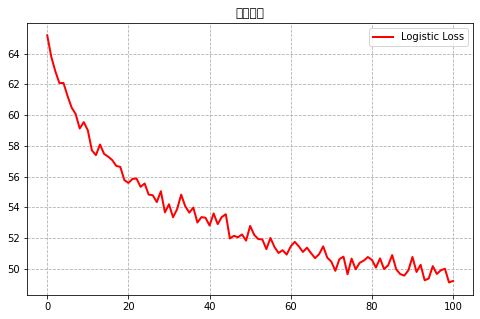

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:509: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:510: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


test
test
test
total_test_accuracy: tensor(0.6667, device='cuda:0')
acc_test_each_k: tensor(0.6667, device='cuda:0')
549 243
549 243
total_train_accuracy: tensor(0.7500, device='cuda:0')
Training Epoch: 0, total loss: 50.112788
total_train_accuracy: tensor(0.7896, device='cuda:0')
Training Epoch: 1, total loss: 49.319911
total_train_accuracy: tensor(0.7792, device='cuda:0')
Training Epoch: 2, total loss: 49.566218
total_train_accuracy: tensor(0.7792, device='cuda:0')
Training Epoch: 3, total loss: 49.614138
total_train_accuracy: tensor(0.7583, device='cuda:0')
Training Epoch: 4, total loss: 49.984126
total_train_accuracy: tensor(0.8188, device='cuda:0')
Training Epoch: 5, total loss: 48.804181
total_train_accuracy: tensor(0.7875, device='cuda:0')
Training Epoch: 6, total loss: 49.082513
total_train_accuracy: tensor(0.7979, device='cuda:0')
Training Epoch: 7, total loss: 49.242210
total_train_accuracy: tensor(0.7938, device='cuda:0')
Training Epoch: 8, total loss: 49.091146
total_train_

total_train_accuracy: tensor(0.8458, device='cuda:0')
Training Epoch: 85, total loss: 47.060188
total_train_accuracy: tensor(0.8479, device='cuda:0')
Training Epoch: 86, total loss: 46.894078
total_train_accuracy: tensor(0.8583, device='cuda:0')
Training Epoch: 87, total loss: 46.988416
total_train_accuracy: tensor(0.8604, device='cuda:0')
Training Epoch: 88, total loss: 46.749606
total_train_accuracy: tensor(0.8771, device='cuda:0')
Training Epoch: 89, total loss: 46.475575
total_train_accuracy: tensor(0.8583, device='cuda:0')
Training Epoch: 90, total loss: 46.464617
total_train_accuracy: tensor(0.8229, device='cuda:0')
Training Epoch: 91, total loss: 47.627680
total_train_accuracy: tensor(0.8438, device='cuda:0')
Training Epoch: 92, total loss: 47.016941
total_train_accuracy: tensor(0.8625, device='cuda:0')
Training Epoch: 93, total loss: 46.511513
total_train_accuracy: tensor(0.8521, device='cuda:0')
Training Epoch: 94, total loss: 47.101888
total_train_accuracy: tensor(0.8417, dev

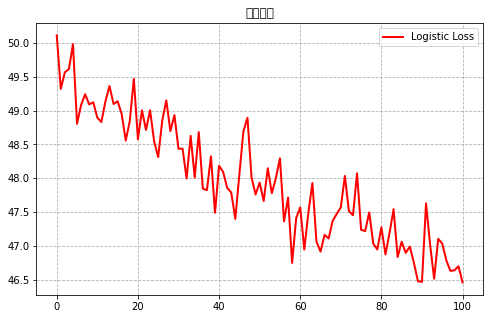

test
test
test
total_test_accuracy: tensor(0.8333, device='cuda:0')
acc_test_each_k: tensor(0.8333, device='cuda:0')
549 243
549 243
total_train_accuracy: tensor(0.8500, device='cuda:0')
Training Epoch: 0, total loss: 46.989219
total_train_accuracy: tensor(0.8417, device='cuda:0')
Training Epoch: 1, total loss: 47.014452
total_train_accuracy: tensor(0.8333, device='cuda:0')
Training Epoch: 2, total loss: 47.432697
total_train_accuracy: tensor(0.8271, device='cuda:0')
Training Epoch: 3, total loss: 47.651591
total_train_accuracy: tensor(0.8417, device='cuda:0')
Training Epoch: 4, total loss: 46.794074
total_train_accuracy: tensor(0.8688, device='cuda:0')
Training Epoch: 5, total loss: 46.305190
total_train_accuracy: tensor(0.8646, device='cuda:0')
Training Epoch: 6, total loss: 46.406600
total_train_accuracy: tensor(0.8604, device='cuda:0')
Training Epoch: 7, total loss: 46.309956
total_train_accuracy: tensor(0.8208, device='cuda:0')
Training Epoch: 8, total loss: 47.410471
total_train_

total_train_accuracy: tensor(0.8563, device='cuda:0')
Training Epoch: 85, total loss: 46.635374
total_train_accuracy: tensor(0.8729, device='cuda:0')
Training Epoch: 86, total loss: 45.952206
total_train_accuracy: tensor(0.8958, device='cuda:0')
Training Epoch: 87, total loss: 45.318553
total_train_accuracy: tensor(0.8563, device='cuda:0')
Training Epoch: 88, total loss: 46.212215
total_train_accuracy: tensor(0.8604, device='cuda:0')
Training Epoch: 89, total loss: 46.235026
total_train_accuracy: tensor(0.8729, device='cuda:0')
Training Epoch: 90, total loss: 46.007716
total_train_accuracy: tensor(0.8667, device='cuda:0')
Training Epoch: 91, total loss: 45.976869
total_train_accuracy: tensor(0.8792, device='cuda:0')
Training Epoch: 92, total loss: 45.733258
total_train_accuracy: tensor(0.8875, device='cuda:0')
Training Epoch: 93, total loss: 45.765871
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 94, total loss: 44.743041
total_train_accuracy: tensor(0.8792, dev

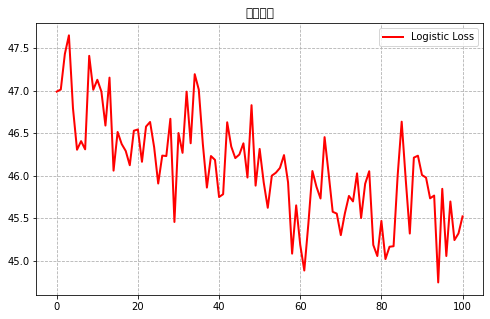

test
test
test
total_test_accuracy: tensor(0.8958, device='cuda:0')
acc_test_each_k: tensor(0.8958, device='cuda:0')
549 243
549 243
total_train_accuracy: tensor(0.9000, device='cuda:0')
Training Epoch: 0, total loss: 45.454941
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 1, total loss: 44.928266
total_train_accuracy: tensor(0.9000, device='cuda:0')
Training Epoch: 2, total loss: 45.116451
total_train_accuracy: tensor(0.8938, device='cuda:0')
Training Epoch: 3, total loss: 45.196262
total_train_accuracy: tensor(0.8813, device='cuda:0')
Training Epoch: 4, total loss: 45.652160
total_train_accuracy: tensor(0.9042, device='cuda:0')
Training Epoch: 5, total loss: 45.164439
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 6, total loss: 44.782132
total_train_accuracy: tensor(0.9104, device='cuda:0')
Training Epoch: 7, total loss: 44.703524
total_train_accuracy: tensor(0.8667, device='cuda:0')
Training Epoch: 8, total loss: 45.738621
total_train_

total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 86, total loss: 44.069813
total_train_accuracy: tensor(0.8938, device='cuda:0')
Training Epoch: 87, total loss: 44.984595
total_train_accuracy: tensor(0.8875, device='cuda:0')
Training Epoch: 88, total loss: 45.077134
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 89, total loss: 44.466796
total_train_accuracy: tensor(0.9104, device='cuda:0')
Training Epoch: 90, total loss: 44.498327
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 91, total loss: 44.853952
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 92, total loss: 44.227997
total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 93, total loss: 44.863166
total_train_accuracy: tensor(0.9083, device='cuda:0')
Training Epoch: 94, total loss: 44.565981
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 95, total loss: 44.399474
total_train_accuracy: tensor(0.8896, dev

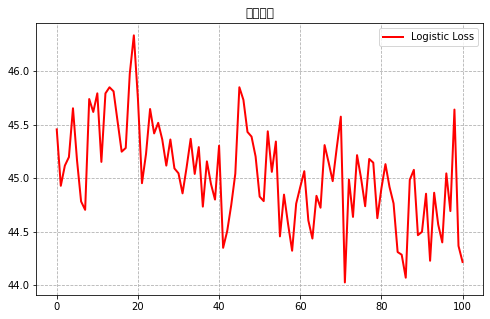

test
test
test
total_test_accuracy: tensor(0.9375, device='cuda:0')
acc_test_each_k: tensor(0.9375, device='cuda:0')
549 243
549 243
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 0, total loss: 44.556610
total_train_accuracy: tensor(0.9042, device='cuda:0')
Training Epoch: 1, total loss: 44.840741
total_train_accuracy: tensor(0.8958, device='cuda:0')
Training Epoch: 2, total loss: 45.158093
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 3, total loss: 44.640750
total_train_accuracy: tensor(0.8938, device='cuda:0')
Training Epoch: 4, total loss: 44.942254
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 5, total loss: 44.633280
total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 6, total loss: 45.063069
total_train_accuracy: tensor(0.9042, device='cuda:0')
Training Epoch: 7, total loss: 44.519891
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 8, total loss: 44.193236
total_train_

total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 85, total loss: 44.191799
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 86, total loss: 44.407675
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 87, total loss: 44.223999
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 88, total loss: 44.327204
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 89, total loss: 43.347619
total_train_accuracy: tensor(0.9125, device='cuda:0')
Training Epoch: 90, total loss: 44.594982
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 91, total loss: 44.172869
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 92, total loss: 44.271708
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 93, total loss: 43.931058
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 94, total loss: 44.091796
total_train_accuracy: tensor(0.9333, dev

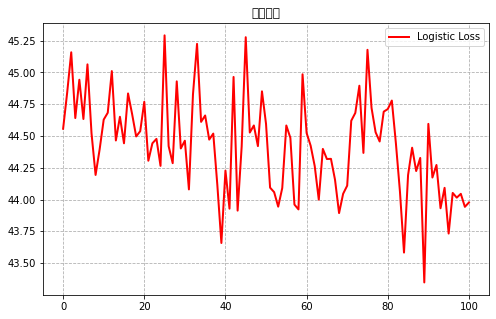

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 243
549 243
total_train_accuracy: tensor(0.9000, device='cuda:0')
Training Epoch: 0, total loss: 44.954527
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 1, total loss: 44.141854
total_train_accuracy: tensor(0.9021, device='cuda:0')
Training Epoch: 2, total loss: 44.606341
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 3, total loss: 44.136286
total_train_accuracy: tensor(0.9021, device='cuda:0')
Training Epoch: 4, total loss: 44.781967
total_train_accuracy: tensor(0.9021, device='cuda:0')
Training Epoch: 5, total loss: 44.513252
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 6, total loss: 44.408438
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 7, total loss: 44.681157
total_train_accuracy: tensor(0.9000, device='cuda:0')
Training Epoch: 8, total loss: 44.711057
total_train_

total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 85, total loss: 43.913846
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 86, total loss: 44.125895
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 87, total loss: 44.574557
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 88, total loss: 43.995673
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 89, total loss: 44.093356
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 90, total loss: 43.988172
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 91, total loss: 43.738574
total_train_accuracy: tensor(0.9125, device='cuda:0')
Training Epoch: 92, total loss: 44.339618
total_train_accuracy: tensor(0.8854, device='cuda:0')
Training Epoch: 93, total loss: 45.197637
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 94, total loss: 43.547299
total_train_accuracy: tensor(0.9021, dev

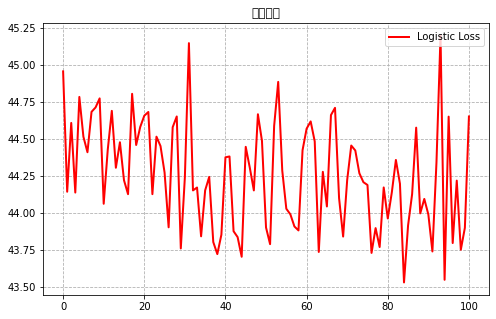

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 243
549 243
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 0, total loss: 44.355010
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 1, total loss: 44.016632
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 2, total loss: 43.977612
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 3, total loss: 43.690696
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 4, total loss: 43.819215
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 5, total loss: 44.408536
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 6, total loss: 44.182734
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 7, total loss: 43.801062
total_train_accuracy: tensor(0.9083, device='cuda:0')
Training Epoch: 8, total loss: 44.588954
total_train_accuracy

total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 86, total loss: 44.608625
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 87, total loss: 43.852589
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 88, total loss: 43.796637
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 89, total loss: 43.619391
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 90, total loss: 43.752443
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 91, total loss: 43.828794
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 92, total loss: 43.849811
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 93, total loss: 43.546424
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 94, total loss: 43.422387
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 95, total loss: 43.663137
total_train_accuracy: tensor(0.9375, dev

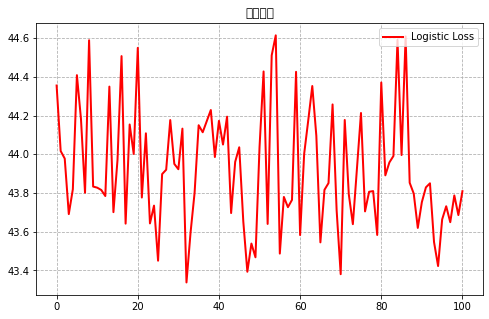

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 243
549 243
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 0, total loss: 44.401245
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 1, total loss: 43.883141
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 2, total loss: 43.972919
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 3, total loss: 43.807424
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 4, total loss: 44.013082
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 5, total loss: 43.823047
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 6, total loss: 44.194139
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 7, total loss: 44.048900
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 8, total loss: 43.723033
total_train_accuracy

total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 86, total loss: 43.885329
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 87, total loss: 43.397017
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 88, total loss: 43.379149
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 89, total loss: 44.041907
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 90, total loss: 43.696068
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 91, total loss: 43.412806
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 92, total loss: 43.252409
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 93, total loss: 43.232086
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 94, total loss: 44.018383
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 95, total loss: 43.200976
total_train_accuracy: tensor(0.9292, dev

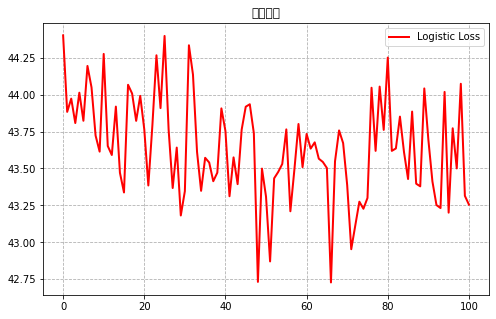

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 243
549 243
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 0, total loss: 43.776691
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 1, total loss: 43.904344
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 2, total loss: 44.247946
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 3, total loss: 43.287950
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 4, total loss: 43.445927
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 5, total loss: 43.339593
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 6, total loss: 43.732755
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 7, total loss: 43.599640
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 8, total loss: 43.391941
total_train_

total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 85, total loss: 43.298161
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 86, total loss: 43.026764
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 87, total loss: 42.921642
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 88, total loss: 42.997836
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 89, total loss: 43.425392
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 90, total loss: 43.904941
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 91, total loss: 43.283881
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 92, total loss: 43.794347
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 93, total loss: 43.740306
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 94, total loss: 42.970620
total_train_accuracy: tensor(0.9354, dev

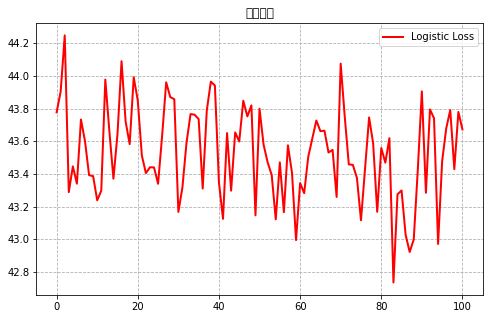

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 243
549 243
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 0, total loss: 44.079121
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 1, total loss: 43.669066
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 2, total loss: 43.336844
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 3, total loss: 43.029203
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 4, total loss: 43.572924
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 5, total loss: 43.246420
total_train_accuracy: tensor(0.9125, device='cuda:0')
Training Epoch: 6, total loss: 44.407385
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 7, total loss: 43.712836
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 8, total loss: 43.470819
total_train_

total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 86, total loss: 43.751976
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 87, total loss: 44.050464
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 88, total loss: 43.717647
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 89, total loss: 43.173012
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 90, total loss: 43.500727
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 91, total loss: 43.441533
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 92, total loss: 43.158727
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 93, total loss: 43.151954
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 94, total loss: 43.476864
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 95, total loss: 43.505100
total_train_accuracy: tensor(0.9438, dev

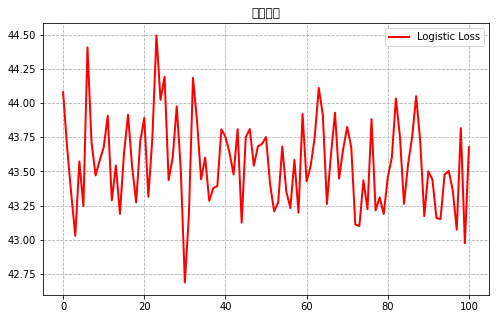

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
[tensor(0.6667, device='cuda:0'), tensor(0.8333, device='cuda:0'), tensor(0.8958, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0')]
[array(0.6666667, dtype=float32), array(0.8333334, dtype=float32), array(0.8958334, dtype=float32), array(0.9375, dtype=float32), array(0.9583334, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(0.9791667, dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32)]
acc_test_metrics: 0.925


In [17]:
model=model1
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_s/max_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_s/max_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='models/MLP_s/max/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP1(
  (bn0): BatchNorm1d(242, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=242, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 243
f1_score:  %.4f 0.9102887616130995
accuracy_score: 0.9057971014492754
recall_score: 0.9126699226699225
pre_recall: 0.9181042884990254
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

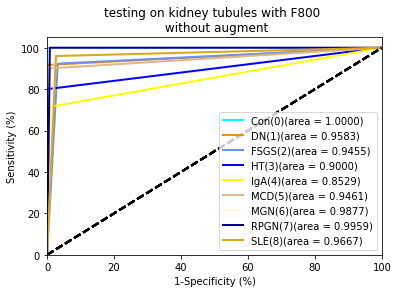

In [18]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='models/MLP_s/max/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP1()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_s/max_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('testing on kidney tubules with F800 \n without augment')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



In [7]:
#compute mean value of all the correctly predicted samples:

#extract dataset based on top 20
#evaluate top 20 dataset according to evaluatation model's classification effect
import pandas as pd 
import torch
import numpy as np
test_df=pd.read_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP/test_info4_from_max.csv',sep=',')
test_df=test_df.iloc[:,1:]
#print(test_df)
##
columns=test_df.columns
row_max_np=np.array(test_df)
print(row_max_np)

rows,cols=test_df.shape
print(rows,cols)

print(row_max_np)
row_max_tensor=torch.from_numpy(row_max_np).cuda()
row_max_tensor=torch.tensor(row_max_tensor,dtype=torch.float)
#去掉行




#compute contribution using the Equ.
import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

path='models/MLP/MLP610.pt'

#nfm=NFM(nfm_config)
model=MLP()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
model.load_state_dict(torch.load(path),strict=False)
model.cuda()

print(model)




model_params = list(model.named_parameters())
#print(nfm_params)
net=model



weight={}
for name,parameters in net.named_parameters():
    print(name,':',parameters.size())
    #names.append(name)
    weight[name]=parameters
#print("weight:",weight)
#q
'''
bn0.weight : torch.Size([3300])
bn0.bias : torch.Size([3300])
fc1.weight : torch.Size([2000, 3300])
fc1.bias : torch.Size([2000])
bn1.weight : torch.Size([2000])
bn1.bias : torch.Size([2000])
fc2.weight : torch.Size([100, 2000])
fc2.bias : torch.Size([100])
bn2.weight : torch.Size([100])
bn2.bias : torch.Size([100])
fc3.weight : torch.Size([9, 100])
fc3.bias : torch.Size([9])
bn3.weight : torch.Size([9])
bn3.bias : torch.Size([9])
'''






def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    n = len(labels)
    #n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output







l3=torch.mm(weight['fc3.weight'],weight['fc2.weight'])
print('l3:',l3.shape)
l2=torch.mm(l3,weight['fc1.weight'])
print('l2:',l2.shape)
contri_k=[]
contri_k_names=[]
for i in range(nfm_config['n_class']):
    l1=torch.mm(l2,row_max_tensor.T)
    uu=l2[i,:]*row_max_tensor.reshape(3300)
    print(uu.shape)
    top_k=torch.topk(uu,20,largest=True)######################top 20
    print('top_k:',top_k)
    
    contri_k.append(top_k)
    top_k_indices=top_k.indices.cpu().detach().numpy().tolist()
    print('top_k_indices:',top_k_indices)
    top_k_names=[columns[j] for j in top_k_indices]
    print(top_k_names)
    contri_k_names.append(top_k_names)

contri_k_names_np=np.array(contri_k_names)
print(contri_k_names_np.shape)

contri_k_names_df=pd.DataFrame(contri_k_names_np)
contri_k_names_df.to_csv('results_genes/MLP/max_contri_20_names_df.csv')
#from chartGPT of the following code
result = set()
for sublist in contri_k_names:
    result = result.union(sublist)

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(result_list)

import csv
csv_filename = "results_genes/MLP/max_genes_all_20.csv"

# 使用CSV模块保存列表为CSV文件
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')
train_df1=train_df
print(train_df1.columns)
train_df=train_df.iloc[:,1:]
train_df1=train_df1.iloc[:,1:-1]

columns=result_list
columns.append('label')
print(columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_20/max_train_val_info.csv')

test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_20/max_test_info.csv')





[[6.20620106 9.83624556 7.03888594 ... 6.60749236 5.08499007 5.        ]]
1 3300
[[6.20620106 9.83624556 7.03888594 ... 6.60749236 5.08499007 5.        ]]
MLP(
  (bn0): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3300, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
bn0.weight : torch.Size([3300])
bn0.bias : torch.Size([3300])
fc1.weight : torch.Size([2000, 3300])
fc1.bias : torch.Size([2000])
bn1.weight : torch.Size([2000])
bn1.bias : torch.Size([2000])
fc2.weight : torch.Size([100, 2000])
fc2.bias : torch.Size(

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Index(['Unnamed: 0', 'RHOA', 'STX2', 'CISD1', 'WDR11', 'SCYL2', 'MGC2889',
       'CCDC47', 'KLF8', 'CCL1',
       ...
       'PLAC4', 'NRBP1', 'LRRC23', 'SPHK2', 'KIAA0513', 'SULT1A1', 'AMOT',
       'CA1', 'GPR35', 'label'],
      dtype='object', length=3302)
['THRA', 'HAO2', 'PIK3C2B', 'PLCD1', 'ACKR2', 'HMBS', 'XPO6', 'GM2A', 'MAB21L4', 'ADNP', 'PSMB5', 'ABHD3', 'CCNC', 'KLHDC10', 'COX8A', 'PFKP', 'SMO', 'EBP', 'AJAP1', 'CLIC4', 'MFSD11', 'METTL22', 'AHCYL2', 'FBXO9', 'ACTB', 'PURA', 'ACAD8', 'ADRA2B', 'PCF11', 'PPP6R1', 'LDHB', 'AGMAT', 'RGN', 'FADS2', 'ADIPOR1', 'MRPL13', 'PDGFC', 'YARS', 'TSPAN15', 'DLG1', 'ACE2', 'SGF29', 'DIPK1A', 'RHCG', 'IFRD1', 'ADPGK', 'PSMB9', 'SSR1', 'PLA2G2A', 'TNS1', 'UBR5', 'MED18', 'NFE2L1', 'GATM', 'FLT3', 'RHOC', 'SOX21', 'SETDB1', 'FEM1C', 'CRYL1', 'PSMC5', 'PSMB1', 'FSTL1', 'RPL5', 'SLC7A4', 'RORA', 'ATP6V0E2', 'DAD1', 'AAGAB', 'ABO', 'DAPK2', 'DSCR4', 'APOE', 'SLCO4C1', 'HP', 'ELOC', 'SLC25A36', 'FDX1', 'ZBTB7B', 'ASNS', 'C1orf56', 'FSCN3', 'DNA

549 128
549 128
total_train_accuracy: 

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:471: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:472: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


tensor(0.1438, device='cuda:0')
Training Epoch: 0, total loss: 65.695528
total_train_accuracy: tensor(0.2938, device='cuda:0')
Training Epoch: 1, total loss: 63.858453
total_train_accuracy: tensor(0.3396, device='cuda:0')
Training Epoch: 2, total loss: 62.718666
total_train_accuracy: tensor(0.3792, device='cuda:0')
Training Epoch: 3, total loss: 62.272051
total_train_accuracy: tensor(0.4042, device='cuda:0')
Training Epoch: 4, total loss: 61.759095
total_train_accuracy: tensor(0.4375, device='cuda:0')
Training Epoch: 5, total loss: 61.488533
total_train_accuracy: tensor(0.4458, device='cuda:0')
Training Epoch: 6, total loss: 60.678031
total_train_accuracy: tensor(0.5104, device='cuda:0')
Training Epoch: 7, total loss: 59.984766
total_train_accuracy: tensor(0.4833, device='cuda:0')
Training Epoch: 8, total loss: 59.816484
total_train_accuracy: tensor(0.5125, device='cuda:0')
Training Epoch: 9, total loss: 59.402863
total_train_accuracy: tensor(0.5167, device='cuda:0')
Training Epoch: 10

total_train_accuracy: tensor(0.7354, device='cuda:0')
Training Epoch: 86, total loss: 50.813472
total_train_accuracy: tensor(0.7396, device='cuda:0')
Training Epoch: 87, total loss: 50.866685
total_train_accuracy: tensor(0.7354, device='cuda:0')
Training Epoch: 88, total loss: 50.528612
total_train_accuracy: tensor(0.7458, device='cuda:0')
Training Epoch: 89, total loss: 50.445629
total_train_accuracy: tensor(0.7583, device='cuda:0')
Training Epoch: 90, total loss: 50.436009
total_train_accuracy: tensor(0.7750, device='cuda:0')
Training Epoch: 91, total loss: 50.131283
total_train_accuracy: tensor(0.7375, device='cuda:0')
Training Epoch: 92, total loss: 50.878723
total_train_accuracy: tensor(0.7438, device='cuda:0')
Training Epoch: 93, total loss: 50.585371
total_train_accuracy: tensor(0.7271, device='cuda:0')
Training Epoch: 94, total loss: 50.912017
total_train_accuracy: tensor(0.7417, device='cuda:0')
Training Epoch: 95, total loss: 50.449204
total_train_accuracy: tensor(0.7750, dev

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


the  0  epoch ends


/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


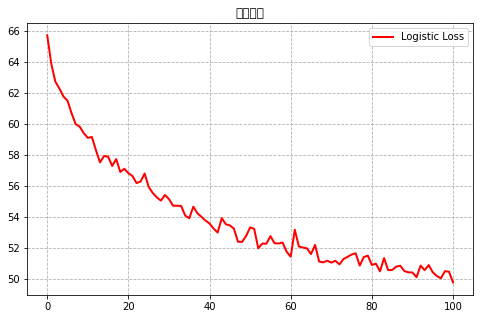

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:509: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:510: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


test
test
test
total_test_accuracy: tensor(0.5417, device='cuda:0')
acc_test_each_k: tensor(0.5417, device='cuda:0')
549 128
549 128
total_train_accuracy: tensor(0.7229, device='cuda:0')
Training Epoch: 0, total loss: 50.958641
total_train_accuracy: tensor(0.7063, device='cuda:0')
Training Epoch: 1, total loss: 50.981093
total_train_accuracy: tensor(0.7375, device='cuda:0')
Training Epoch: 2, total loss: 50.210971
total_train_accuracy: tensor(0.7646, device='cuda:0')
Training Epoch: 3, total loss: 49.764001
total_train_accuracy: tensor(0.7271, device='cuda:0')
Training Epoch: 4, total loss: 50.382516
total_train_accuracy: tensor(0.7771, device='cuda:0')
Training Epoch: 5, total loss: 49.854645
total_train_accuracy: tensor(0.7729, device='cuda:0')
Training Epoch: 6, total loss: 49.328603
total_train_accuracy: tensor(0.7792, device='cuda:0')
Training Epoch: 7, total loss: 49.434882
total_train_accuracy: tensor(0.7458, device='cuda:0')
Training Epoch: 8, total loss: 50.582624
total_train_

total_train_accuracy: tensor(0.8063, device='cuda:0')
Training Epoch: 85, total loss: 47.996281
total_train_accuracy: tensor(0.8250, device='cuda:0')
Training Epoch: 86, total loss: 47.592520
total_train_accuracy: tensor(0.7854, device='cuda:0')
Training Epoch: 87, total loss: 48.414826
total_train_accuracy: tensor(0.8063, device='cuda:0')
Training Epoch: 88, total loss: 48.075144
total_train_accuracy: tensor(0.8083, device='cuda:0')
Training Epoch: 89, total loss: 47.870663
total_train_accuracy: tensor(0.8625, device='cuda:0')
Training Epoch: 90, total loss: 46.983709
total_train_accuracy: tensor(0.7896, device='cuda:0')
Training Epoch: 91, total loss: 48.083122
total_train_accuracy: tensor(0.8521, device='cuda:0')
Training Epoch: 92, total loss: 47.139259
total_train_accuracy: tensor(0.8396, device='cuda:0')
Training Epoch: 93, total loss: 47.305162
total_train_accuracy: tensor(0.8250, device='cuda:0')
Training Epoch: 94, total loss: 47.378216
total_train_accuracy: tensor(0.8083, dev

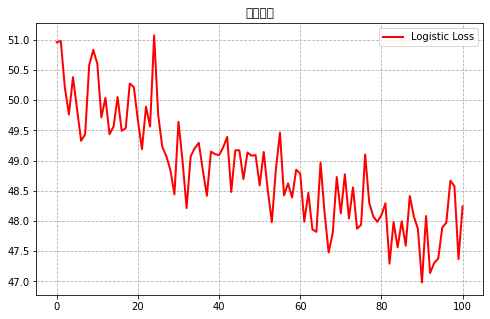

test
test
test
total_test_accuracy: tensor(0.8125, device='cuda:0')
acc_test_each_k: tensor(0.8125, device='cuda:0')
549 128
549 128
total_train_accuracy: tensor(0.8271, device='cuda:0')
Training Epoch: 0, total loss: 47.740659
total_train_accuracy: tensor(0.8229, device='cuda:0')
Training Epoch: 1, total loss: 47.553480
total_train_accuracy: tensor(0.8250, device='cuda:0')
Training Epoch: 2, total loss: 47.615688
total_train_accuracy: tensor(0.8271, device='cuda:0')
Training Epoch: 3, total loss: 47.411789
total_train_accuracy: tensor(0.8313, device='cuda:0')
Training Epoch: 4, total loss: 47.828118
total_train_accuracy: tensor(0.8104, device='cuda:0')
Training Epoch: 5, total loss: 48.189934
total_train_accuracy: tensor(0.8188, device='cuda:0')
Training Epoch: 6, total loss: 47.649889
total_train_accuracy: tensor(0.8229, device='cuda:0')
Training Epoch: 7, total loss: 47.326432
total_train_accuracy: tensor(0.8208, device='cuda:0')
Training Epoch: 8, total loss: 47.620710
total_train_

total_train_accuracy: tensor(0.8688, device='cuda:0')
Training Epoch: 85, total loss: 45.929830
total_train_accuracy: tensor(0.9021, device='cuda:0')
Training Epoch: 86, total loss: 45.378384
total_train_accuracy: tensor(0.8771, device='cuda:0')
Training Epoch: 87, total loss: 45.987561
total_train_accuracy: tensor(0.8604, device='cuda:0')
Training Epoch: 88, total loss: 46.635809
total_train_accuracy: tensor(0.8479, device='cuda:0')
Training Epoch: 89, total loss: 46.736190
total_train_accuracy: tensor(0.8604, device='cuda:0')
Training Epoch: 90, total loss: 46.387295
total_train_accuracy: tensor(0.8667, device='cuda:0')
Training Epoch: 91, total loss: 46.566010
total_train_accuracy: tensor(0.8542, device='cuda:0')
Training Epoch: 92, total loss: 46.554533
total_train_accuracy: tensor(0.8667, device='cuda:0')
Training Epoch: 93, total loss: 46.421916
total_train_accuracy: tensor(0.8667, device='cuda:0')
Training Epoch: 94, total loss: 46.143147
total_train_accuracy: tensor(0.8604, dev

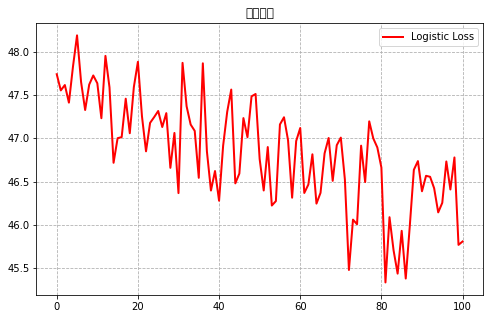

test
test
test
total_test_accuracy: tensor(0.8542, device='cuda:0')
acc_test_each_k: tensor(0.8542, device='cuda:0')
549 128
549 128
total_train_accuracy: tensor(0.8667, device='cuda:0')
Training Epoch: 0, total loss: 46.266505
total_train_accuracy: tensor(0.8542, device='cuda:0')
Training Epoch: 1, total loss: 46.351989
total_train_accuracy: tensor(0.8563, device='cuda:0')
Training Epoch: 2, total loss: 46.337914
total_train_accuracy: tensor(0.8875, device='cuda:0')
Training Epoch: 3, total loss: 45.577699
total_train_accuracy: tensor(0.8667, device='cuda:0')
Training Epoch: 4, total loss: 46.190665
total_train_accuracy: tensor(0.8604, device='cuda:0')
Training Epoch: 5, total loss: 46.198883
total_train_accuracy: tensor(0.9021, device='cuda:0')
Training Epoch: 6, total loss: 45.396905
total_train_accuracy: tensor(0.8375, device='cuda:0')
Training Epoch: 7, total loss: 46.655261
total_train_accuracy: tensor(0.8521, device='cuda:0')
Training Epoch: 8, total loss: 46.609092
total_train_

total_train_accuracy: tensor(0.8771, device='cuda:0')
Training Epoch: 85, total loss: 45.645768
total_train_accuracy: tensor(0.8917, device='cuda:0')
Training Epoch: 86, total loss: 45.503770
total_train_accuracy: tensor(0.8917, device='cuda:0')
Training Epoch: 87, total loss: 45.098484
total_train_accuracy: tensor(0.8833, device='cuda:0')
Training Epoch: 88, total loss: 45.502749
total_train_accuracy: tensor(0.8896, device='cuda:0')
Training Epoch: 89, total loss: 45.593604
total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 90, total loss: 45.193408
total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 91, total loss: 45.208554
total_train_accuracy: tensor(0.8333, device='cuda:0')
Training Epoch: 92, total loss: 46.585113
total_train_accuracy: tensor(0.8833, device='cuda:0')
Training Epoch: 93, total loss: 45.484717
total_train_accuracy: tensor(0.8688, device='cuda:0')
Training Epoch: 94, total loss: 45.652694
total_train_accuracy: tensor(0.8854, dev

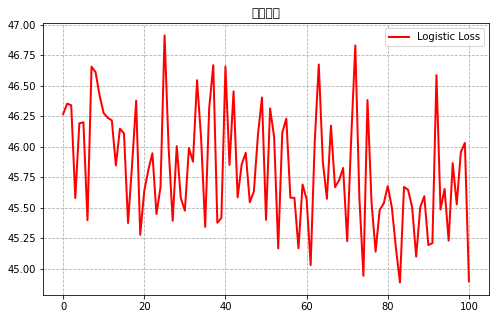

test
test
test
total_test_accuracy: tensor(0.9375, device='cuda:0')
acc_test_each_k: tensor(0.9375, device='cuda:0')
549 128
549 128
total_train_accuracy: tensor(0.8750, device='cuda:0')
Training Epoch: 0, total loss: 45.947547
total_train_accuracy: tensor(0.8833, device='cuda:0')
Training Epoch: 1, total loss: 45.626807
total_train_accuracy: tensor(0.8667, device='cuda:0')
Training Epoch: 2, total loss: 45.653040
total_train_accuracy: tensor(0.8875, device='cuda:0')
Training Epoch: 3, total loss: 45.459234
total_train_accuracy: tensor(0.8917, device='cuda:0')
Training Epoch: 4, total loss: 45.394893
total_train_accuracy: tensor(0.8750, device='cuda:0')
Training Epoch: 5, total loss: 45.852484
total_train_accuracy: tensor(0.8792, device='cuda:0')
Training Epoch: 6, total loss: 45.626032
total_train_accuracy: tensor(0.8875, device='cuda:0')
Training Epoch: 7, total loss: 45.271665
total_train_accuracy: tensor(0.8750, device='cuda:0')
Training Epoch: 8, total loss: 45.946298
total_train_

total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 85, total loss: 44.988647
total_train_accuracy: tensor(0.8896, device='cuda:0')
Training Epoch: 86, total loss: 45.164911
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 87, total loss: 44.541594
total_train_accuracy: tensor(0.9000, device='cuda:0')
Training Epoch: 88, total loss: 45.004073
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 89, total loss: 44.533638
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 90, total loss: 44.646549
total_train_accuracy: tensor(0.9000, device='cuda:0')
Training Epoch: 91, total loss: 44.756777
total_train_accuracy: tensor(0.9104, device='cuda:0')
Training Epoch: 92, total loss: 44.349258
total_train_accuracy: tensor(0.8813, device='cuda:0')
Training Epoch: 93, total loss: 45.244150
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 94, total loss: 44.479715
total_train_accuracy: tensor(0.9146, dev

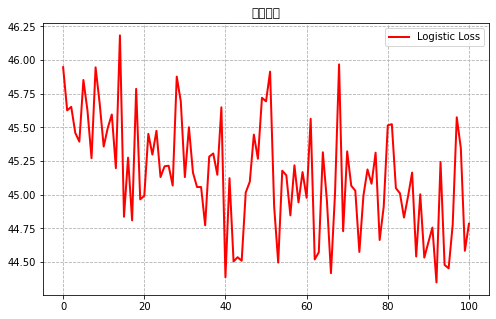

test
test
test
total_test_accuracy: tensor(0.9375, device='cuda:0')
acc_test_each_k: tensor(0.9375, device='cuda:0')
549 128
549 128
total_train_accuracy: tensor(0.8625, device='cuda:0')
Training Epoch: 0, total loss: 46.016043
total_train_accuracy: tensor(0.8833, device='cuda:0')
Training Epoch: 1, total loss: 45.391877
total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 2, total loss: 44.996345
total_train_accuracy: tensor(0.8771, device='cuda:0')
Training Epoch: 3, total loss: 45.289426
total_train_accuracy: tensor(0.8604, device='cuda:0')
Training Epoch: 4, total loss: 45.711149
total_train_accuracy: tensor(0.8813, device='cuda:0')
Training Epoch: 5, total loss: 45.559057
total_train_accuracy: tensor(0.8833, device='cuda:0')
Training Epoch: 6, total loss: 45.577891
total_train_accuracy: tensor(0.9042, device='cuda:0')
Training Epoch: 7, total loss: 44.667037
total_train_accuracy: tensor(0.8771, device='cuda:0')
Training Epoch: 8, total loss: 45.517729
total_train_

total_train_accuracy: tensor(0.9125, device='cuda:0')
Training Epoch: 85, total loss: 44.681805
total_train_accuracy: tensor(0.8875, device='cuda:0')
Training Epoch: 86, total loss: 45.104831
total_train_accuracy: tensor(0.9021, device='cuda:0')
Training Epoch: 87, total loss: 44.886941
total_train_accuracy: tensor(0.8917, device='cuda:0')
Training Epoch: 88, total loss: 45.094825
total_train_accuracy: tensor(0.8813, device='cuda:0')
Training Epoch: 89, total loss: 45.278390
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 90, total loss: 44.264790
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 91, total loss: 44.667198
total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 92, total loss: 44.651780
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 93, total loss: 44.219072
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 94, total loss: 44.413035
total_train_accuracy: tensor(0.9167, dev

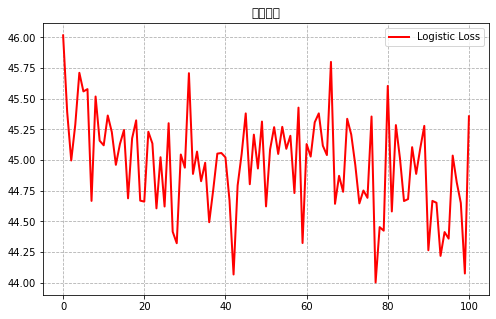

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 128
549 128
total_train_accuracy: tensor(0.9042, device='cuda:0')
Training Epoch: 0, total loss: 44.776372
total_train_accuracy: tensor(0.9021, device='cuda:0')
Training Epoch: 1, total loss: 44.948981
total_train_accuracy: tensor(0.8792, device='cuda:0')
Training Epoch: 2, total loss: 45.329765
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 3, total loss: 44.237247
total_train_accuracy: tensor(0.8958, device='cuda:0')
Training Epoch: 4, total loss: 44.854855
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 5, total loss: 44.640241
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 6, total loss: 44.708357
total_train_accuracy: tensor(0.8563, device='cuda:0')
Training Epoch: 7, total loss: 46.094953
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 8, total loss: 44.701609
total_train_accuracy

total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 85, total loss: 44.817686
total_train_accuracy: tensor(0.9083, device='cuda:0')
Training Epoch: 86, total loss: 44.464668
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 87, total loss: 44.240999
total_train_accuracy: tensor(0.9083, device='cuda:0')
Training Epoch: 88, total loss: 44.453391
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 89, total loss: 44.749003
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 90, total loss: 44.500170
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 91, total loss: 44.267089
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 92, total loss: 44.336733
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 93, total loss: 44.013955
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 94, total loss: 44.736465
total_train_accuracy: tensor(0.8729, dev

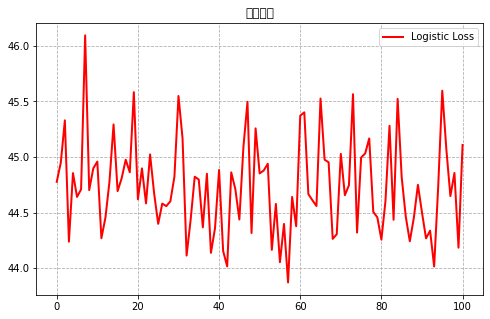

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 128
549 128
total_train_accuracy: tensor(0.8896, device='cuda:0')
Training Epoch: 0, total loss: 44.869221
total_train_accuracy: tensor(0.9104, device='cuda:0')
Training Epoch: 1, total loss: 44.691132
total_train_accuracy: tensor(0.9042, device='cuda:0')
Training Epoch: 2, total loss: 44.693252
total_train_accuracy: tensor(0.8917, device='cuda:0')
Training Epoch: 3, total loss: 44.860886
total_train_accuracy: tensor(0.9125, device='cuda:0')
Training Epoch: 4, total loss: 44.618512
total_train_accuracy: tensor(0.8938, device='cuda:0')
Training Epoch: 5, total loss: 45.079151
total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 6, total loss: 44.911560
total_train_accuracy: tensor(0.8958, device='cuda:0')
Training Epoch: 7, total loss: 44.698397
total_train_accuracy: tensor(0.9042, device='cuda:0')
Training Epoch: 8, total loss: 44.455465
total_train_

total_train_accuracy: tensor(0.9104, device='cuda:0')
Training Epoch: 85, total loss: 44.557625
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 86, total loss: 44.301984
total_train_accuracy: tensor(0.9021, device='cuda:0')
Training Epoch: 87, total loss: 44.675724
total_train_accuracy: tensor(0.9042, device='cuda:0')
Training Epoch: 88, total loss: 44.495816
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 89, total loss: 44.728755
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 90, total loss: 44.308557
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 91, total loss: 44.104052
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 92, total loss: 43.934685
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 93, total loss: 44.172835
total_train_accuracy: tensor(0.8896, device='cuda:0')
Training Epoch: 94, total loss: 44.876462
total_train_accuracy: tensor(0.8958, dev

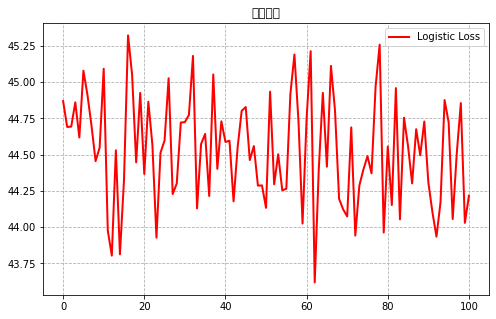

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 128
549 128
total_train_accuracy: tensor(0.8771, device='cuda:0')
Training Epoch: 0, total loss: 45.241695
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 1, total loss: 44.085728
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 2, total loss: 44.086191
total_train_accuracy: tensor(0.9104, device='cuda:0')
Training Epoch: 3, total loss: 44.535253
total_train_accuracy: tensor(0.9000, device='cuda:0')
Training Epoch: 4, total loss: 44.571674
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 5, total loss: 44.213844
total_train_accuracy: tensor(0.8896, device='cuda:0')
Training Epoch: 6, total loss: 44.983461
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 7, total loss: 44.643956
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 8, total loss: 44.275287
total_train_

total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 85, total loss: 44.062154
total_train_accuracy: tensor(0.8917, device='cuda:0')
Training Epoch: 86, total loss: 44.849945
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 87, total loss: 44.669277
total_train_accuracy: tensor(0.9125, device='cuda:0')
Training Epoch: 88, total loss: 44.305081
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 89, total loss: 43.804484
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 90, total loss: 43.823395
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 91, total loss: 43.870178
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 92, total loss: 44.305215
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 93, total loss: 44.084261
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 94, total loss: 44.111339
total_train_accuracy: tensor(0.9146, dev

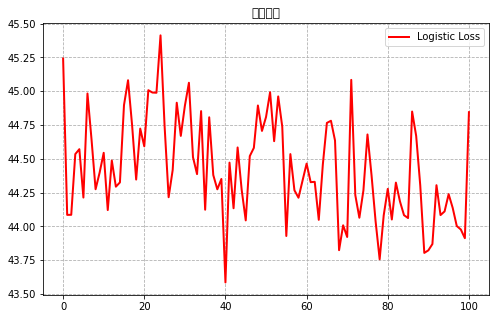

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 128
549 128
total_train_accuracy: tensor(0.9125, device='cuda:0')
Training Epoch: 0, total loss: 44.353678
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 1, total loss: 44.020604
total_train_accuracy: tensor(0.8896, device='cuda:0')
Training Epoch: 2, total loss: 45.081124
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 3, total loss: 44.119456
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 4, total loss: 44.073649
total_train_accuracy: tensor(0.9125, device='cuda:0')
Training Epoch: 5, total loss: 44.222205
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 6, total loss: 43.608753
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 7, total loss: 44.066252
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 8, total loss: 44.134689
total_train_accuracy

total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 85, total loss: 43.905784
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 86, total loss: 44.051121
total_train_accuracy: tensor(0.9083, device='cuda:0')
Training Epoch: 87, total loss: 44.361132
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 88, total loss: 44.497036
total_train_accuracy: tensor(0.9125, device='cuda:0')
Training Epoch: 89, total loss: 44.102256
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 90, total loss: 44.408079
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 91, total loss: 43.958064
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 92, total loss: 43.720201
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 93, total loss: 43.795168
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 94, total loss: 44.194127
total_train_accuracy: tensor(0.9104, dev

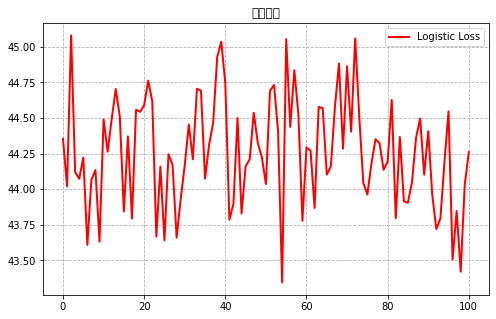

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
[tensor(0.5417, device='cuda:0'), tensor(0.8125, device='cuda:0'), tensor(0.8542, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0')]
[array(0.5416667, dtype=float32), array(0.8125, dtype=float32), array(0.8541667, dtype=float32), array(0.9375, dtype=float32), array(0.9375, dtype=float32), array(1., dtype=float32), array(0.9791667, dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]
acc_test_metrics: 0.9041667


In [10]:
model=model2
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_20/max_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_20/max_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='models/MLP_20/max/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP2(
  (bn0): BatchNorm1d(127, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=127, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 128
f1_score:  %.4f 0.7969706125027374
accuracy_score: 0.8043478260869565
recall_score: 0.8039076827312122
pre_recall: 0.8185664860856677
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

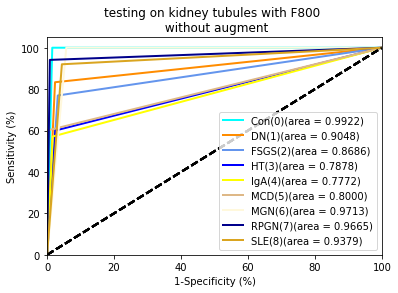

In [11]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='models/MLP_20/max/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP2()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_20/max_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('testing on kidney tubules with F800 \n without augment')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 

